In [1]:
import seaborn as sns
import pandas as pd
import sklearn
import matplotlib
%matplotlib inline

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv(r'/Users/sankar/Downloads/US Police shootings in from 2015-22.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
df.shape

(7682, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7682 entries, 0 to 7681
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7682 non-null   int64  
 1   name                     7275 non-null   object 
 2   date                     7682 non-null   object 
 3   manner_of_death          7682 non-null   object 
 4   armed                    7473 non-null   object 
 5   age                      7210 non-null   float64
 6   gender                   7663 non-null   object 
 7   race                     6244 non-null   object 
 8   city                     7682 non-null   object 
 9   state                    7682 non-null   object 
 10  signs_of_mental_illness  7682 non-null   bool   
 11  threat_level             7682 non-null   object 
 12  flee                     6819 non-null   object 
 13  body_camera              7682 non-null   bool   
 14  longitude               

In [6]:
df1=df.drop(["id","name","date","city","state","threat_level","flee","body_camera","longitude","latitude","is_geocoding_exact"],axis="columns")
df1.head()

,manner_of_death,armed,age,gender,race,signs_of_mental_illness
0,shot,gun,53.0,M,A,True
1,shot,gun,47.0,M,W,False
2,shot and Tasered,unarmed,23.0,M,H,False
3,shot,toy weapon,32.0,M,W,True
4,shot,nail gun,39.0,M,H,False


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7682 entries, 0 to 7681
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   manner_of_death          7682 non-null   object 
 1   armed                    7473 non-null   object 
 2   age                      7210 non-null   float64
 3   gender                   7663 non-null   object 
 4   race                     6244 non-null   object 
 5   signs_of_mental_illness  7682 non-null   bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 307.7+ KB


In [8]:
df1.columns[df1.isna().any()]

Index(['armed', 'age', 'gender', 'race'], dtype='object')

In [9]:
df.groupby('signs_of_mental_illness').size()

signs_of_mental_illness
False    6058
True     1624
dtype: int64

In [10]:
df1.describe()

,age
count,7210.000000
mean,37.161997
std,12.951797
min,2.000000
25%,27.000000
50%,35.000000
75%,45.000000
max,92.000000


In [11]:
from sklearn.preprocessing import LabelEncoder
le_armed=LabelEncoder()
le_manner_of_death=LabelEncoder()
le_race=LabelEncoder()
le_gender=LabelEncoder()
le_signs_of_mental_illness=LabelEncoder()

In [12]:
df1['armed_n'] = le_armed.fit_transform(df1['armed'].astype(str))
df1['manner_of_death_n'] = le_manner_of_death.fit_transform(df1['manner_of_death'])
df1['race_n'] = le_race.fit_transform(df1['race'])
df1['gender_n'] = le_gender.fit_transform(df1['gender'])
df1['signs_of_mental_illness_n'] = le_signs_of_mental_illness.fit_transform(df1['signs_of_mental_illness'])

In [13]:
df1

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,armed_n,manner_of_death_n,race_n,gender_n,signs_of_mental_illness_n
0,shot,gun,53.0,M,A,True,39,0,0,1,1
1,shot,gun,47.0,M,W,False,39,0,5,1,0
2,shot and Tasered,unarmed,23.0,M,H,False,95,1,2,1,0
3,shot,toy weapon,32.0,M,W,True,94,0,5,1,1
4,shot,nail gun,39.0,M,H,False,69,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7677,shot,unknown weapon,NaN,M,NaN,False,97,0,6,1,0
7678,shot,machete,48.0,M,NaN,False,57,0,6,1,0
7679,shot,gun,32.0,M,NaN,False,39,0,6,1,0
7680,shot,gun,NaN,M,NaN,False,39,0,6,1,0


In [14]:
df1.armed_n.median()

39.0

In [15]:
df1.armed_n=df1.armed_n.fillna(df1.armed_n.median())

In [16]:
df1.age.median()

35.0

In [17]:
df1.age=df.age.fillna(df1.age.median())

In [18]:
df1.gender_n.median()

1.0

In [19]:
df1.gender_n=df1.gender_n.fillna(df1.gender_n.median())

In [20]:
df1.race_n.median()

5.0

In [21]:
df1.race_n=df1.race_n.fillna(df1.race_n.median())

In [22]:
df1

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,armed_n,manner_of_death_n,race_n,gender_n,signs_of_mental_illness_n
0,shot,gun,53.0,M,A,True,39,0,0,1,1
1,shot,gun,47.0,M,W,False,39,0,5,1,0
2,shot and Tasered,unarmed,23.0,M,H,False,95,1,2,1,0
3,shot,toy weapon,32.0,M,W,True,94,0,5,1,1
4,shot,nail gun,39.0,M,H,False,69,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7677,shot,unknown weapon,35.0,M,NaN,False,97,0,6,1,0
7678,shot,machete,48.0,M,NaN,False,57,0,6,1,0
7679,shot,gun,32.0,M,NaN,False,39,0,6,1,0
7680,shot,gun,35.0,M,NaN,False,39,0,6,1,0


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7682 entries, 0 to 7681
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   manner_of_death            7682 non-null   object 
 1   armed                      7473 non-null   object 
 2   age                        7682 non-null   float64
 3   gender                     7663 non-null   object 
 4   race                       6244 non-null   object 
 5   signs_of_mental_illness    7682 non-null   bool   
 6   armed_n                    7682 non-null   int64  
 7   manner_of_death_n          7682 non-null   int64  
 8   race_n                     7682 non-null   int64  
 9   gender_n                   7682 non-null   int64  
 10  signs_of_mental_illness_n  7682 non-null   int64  
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 607.8+ KB


In [24]:
df1.describe()

,age,armed_n,manner_of_death_n,race_n,gender_n,signs_of_mental_illness_n
count,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000,7682.000000
mean,37.029159,53.016532,0.044129,3.769071,0.957433,0.211403
std,12.558280,22.891350,0.205395,1.977096,0.213794,0.408330
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,39.000000,0.000000,2.000000,1.000000,0.000000
50%,35.000000,39.000000,0.000000,5.000000,1.000000,0.000000
75%,45.000000,54.000000,0.000000,5.000000,1.000000,0.000000
max,92.000000,103.000000,1.000000,6.000000,2.000000,1.000000


In [25]:
df1

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,armed_n,manner_of_death_n,race_n,gender_n,signs_of_mental_illness_n
0,shot,gun,53.0,M,A,True,39,0,0,1,1
1,shot,gun,47.0,M,W,False,39,0,5,1,0
2,shot and Tasered,unarmed,23.0,M,H,False,95,1,2,1,0
3,shot,toy weapon,32.0,M,W,True,94,0,5,1,1
4,shot,nail gun,39.0,M,H,False,69,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7677,shot,unknown weapon,35.0,M,NaN,False,97,0,6,1,0
7678,shot,machete,48.0,M,NaN,False,57,0,6,1,0
7679,shot,gun,32.0,M,NaN,False,39,0,6,1,0
7680,shot,gun,35.0,M,NaN,False,39,0,6,1,0


<AxesSubplot:xlabel='signs_of_mental_illness_n', ylabel='count'>

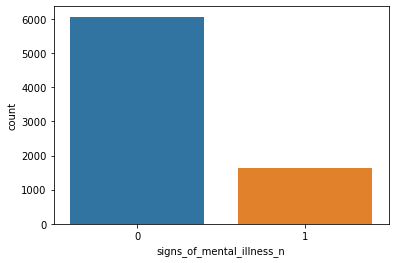

In [26]:
sns.countplot(x="signs_of_mental_illness_n",data=df1)

<AxesSubplot:xlabel='signs_of_mental_illness_n', ylabel='count'>

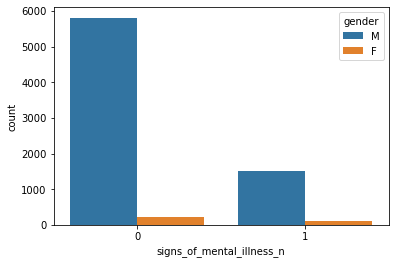

In [27]:
sns.countplot(x="signs_of_mental_illness_n",hue="gender",data=df1)

<AxesSubplot:>

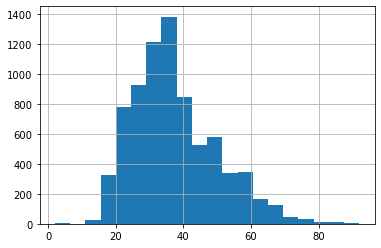

In [28]:
df1['age'].hist(bins=20)

In [29]:
age_category=[]
for i in range (0, len  (df['age'])):
    if df1['age'][i] <= 20:
        age_category.append ('A');
    elif 20< df1['age'][i] <=30:
        age_category.append("B");
    elif 30< df1['age'][i] <=40:
        age_category.append("C");
    elif 40< df1['age'][i] <=50:
        age_category.append("D");  
    elif 50< df1['age'][i] <=60:
        age_category.append("E");
    else:
        age_category.append("F")

In [30]:
age_df = pd.DataFrame (data = age_category, columns = ['agecategory'])
data1 = pd.concat([df1, age_df], axis = 1)
data1.head()

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,armed_n,manner_of_death_n,race_n,gender_n,signs_of_mental_illness_n,agecategory
0,shot,gun,53.0,M,A,True,39,0,0,1,1,E
1,shot,gun,47.0,M,W,False,39,0,5,1,0,D
2,shot and Tasered,unarmed,23.0,M,H,False,95,1,2,1,0,B
3,shot,toy weapon,32.0,M,W,True,94,0,5,1,1,C
4,shot,nail gun,39.0,M,H,False,69,0,2,1,0,C


<AxesSubplot:xlabel='signs_of_mental_illness', ylabel='count'>

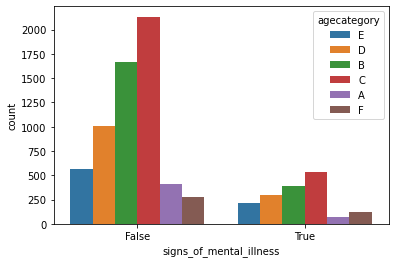

In [31]:
sns.countplot(x="signs_of_mental_illness",hue="agecategory",data=data1)

In [32]:
dummy_armed=pd.get_dummies(data1["armed_n"])
dummy_armed.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
dummy_gender=pd.get_dummies(data1["gender"],drop_first=True)
dummy_gender.head()

,M
0,1
1,1
2,1
3,1
4,1


In [34]:
dummy_mental_illness=pd.get_dummies(data1["signs_of_mental_illness_n"],drop_first=True)
dummy_mental_illness.head()

,1
0,1
1,0
2,0
3,1
4,0


In [35]:
dummy_agecategory=pd.get_dummies(data1["agecategory"])
dummy_agecategory.head()

,A,B,C,D,E,F
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [36]:
final_data_set  = pd.concat ([data1, dummy_gender, dummy_armed,dummy_mental_illness,dummy_agecategory], axis = 1)
final_data_set_1 = final_data_set.drop (columns = ['manner_of_death', 'gender', 'age', 'armed', 'signs_of_mental_illness',"race","armed_n","manner_of_death_n","race_n","gender_n","signs_of_mental_illness_n","agecategory"], axis = 1)
final_data_set_1.head ()

,M,0,1,2,3,4,5,6,7,8,...,101,102,103,1,A,B,C,D,E,F
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
Y = final_data_set_1['M']  #TARGET
X = final_data_set_1.drop (columns =['M'], axis = 1)

In [38]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,1,A,B,C,D,E,F
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

In [40]:
test_set_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)
model = LogisticRegression (solver = 'liblinear')
model.fit (X_train.values, Y_train)

LogisticRegression(solver='liblinear')

In [41]:
predictions = model.predict (X_test.values)

In [42]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.95      1.00      0.98      1465

    accuracy                           0.95      1537
   macro avg       0.48      0.50      0.49      1537
weighted avg       0.91      0.95      0.93      1537



/Users/sankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print (confusion_matrix (Y_test, predictions))

[[   0   72]
 [   0 1465]]


In [44]:
df1.head()

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,armed_n,manner_of_death_n,race_n,gender_n,signs_of_mental_illness_n
0,shot,gun,53.0,M,A,True,39,0,0,1,1
1,shot,gun,47.0,M,W,False,39,0,5,1,0
2,shot and Tasered,unarmed,23.0,M,H,False,95,1,2,1,0
3,shot,toy weapon,32.0,M,W,True,94,0,5,1,1
4,shot,nail gun,39.0,M,H,False,69,0,2,1,0


In [45]:
dummy_armeddf1=pd.get_dummies(df1['armed'])
dummy_armeddf1.head()

,Airsoft pistol,BB gun,BB gun and vehicle,Taser,air conditioner,air pistol,ax,ax and machete,barstool,baseball bat,...,toy weapon,unarmed,undetermined,unknown weapon,vehicle,vehicle and gun,vehicle and machete,walking stick,wasp spray,wrench
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df1=pd.concat([df1,dummy_armeddf1],axis=1)
df1.head()

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,armed_n,manner_of_death_n,race_n,gender_n,...,toy weapon,unarmed,undetermined,unknown weapon,vehicle,vehicle and gun,vehicle and machete,walking stick,wasp spray,wrench
0,shot,gun,53.0,M,A,True,39,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,shot,gun,47.0,M,W,False,39,0,5,1,...,0,0,0,0,0,0,0,0,0,0
2,shot and Tasered,unarmed,23.0,M,H,False,95,1,2,1,...,0,1,0,0,0,0,0,0,0,0
3,shot,toy weapon,32.0,M,W,True,94,0,5,1,...,1,0,0,0,0,0,0,0,0,0
4,shot,nail gun,39.0,M,H,False,69,0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
Y =df1['signs_of_mental_illness']
X = df1.iloc [:, 6:8]

In [48]:
X.head()

,armed_n,manner_of_death_n
0,39,0
1,39,0
2,95,1
3,94,0
4,69,0


In [49]:
Y.head()

0     True
1    False
2    False
3     True
4    False
Name: signs_of_mental_illness, dtype: bool

In [50]:
test_set_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)

In [51]:
scaler = StandardScaler ()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [52]:
classifier = LogisticRegression (random_state = seed, solver = 'liblinear')
classifier.fit (X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [53]:
predictions = classifier.predict (X_test)

In [54]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

       False       0.79      1.00      0.89      1220
        True       0.00      0.00      0.00       317

    accuracy                           0.79      1537
   macro avg       0.40      0.50      0.44      1537
weighted avg       0.63      0.79      0.70      1537



/Users/sankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
accuracy_score (Y_test, predictions)

0.7937540663630449

In [56]:
print(accuracy_score)

<function accuracy_score at 0x7fb372fbc820>
